1- get the performance of FL : global model accuracy through  rounds

1       0.00
15     53.00
28     73.50
43     84.50
57     83.85
71     85.38
85     87.00
100    87.00
114    87.00
129    86.00
140    85.00
153    84.50
168    87.54
183    85.50
198    85.50
211    85.50
224    83.85
Name: accuracy, dtype: float64


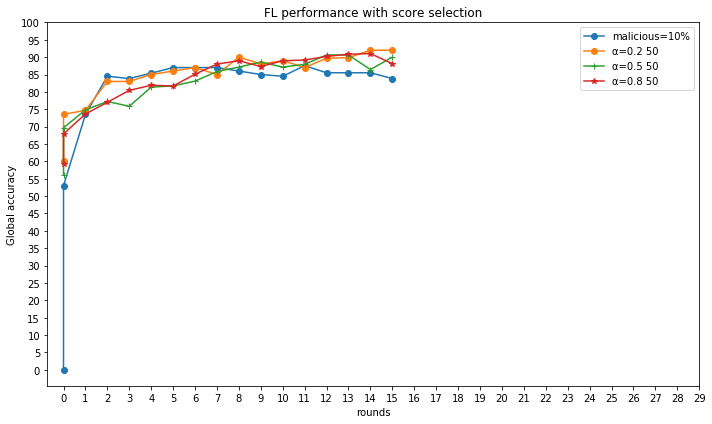

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df2 = pd.read_csv('../results/scenario1/drl/models.csv') 
df5 = pd.read_csv('../results/scenario2/score_malicious30/models.csv') 
df8 = pd.read_csv('../results/scenario2/score_malicious60//models.csv')  # Replace 'your_csv_file.csv' with your actual file name
df52 = pd.read_csv('../results/scenario1/score_alpha02_nodes50/models.csv') 
df55 = pd.read_csv('../results/scenario1/score_alpha05_nodes50/models.csv') 
df58 = pd.read_csv('../results/scenario1/score_alpha08_nodes50/models.csv')  # Replace 'your_csv_file.csv' with your actual file name


# Filter rows with type=2
filtered_df2 = df2[df2['type'] == 2]
filtered_df2 = filtered_df2[1:18]

filtered_df5 = df5[df5['type'] == 2]
filtered_df5 = filtered_df5[1:]

filtered_df8 = df8[df8['type'] == 2]
filtered_df8 = filtered_df8[1:]

filtered_df52 = df52[df52['type'] == 2]
filtered_df52 = filtered_df52[1:18]

filtered_df55 = df55[df55['type'] == 2]
filtered_df55 = filtered_df55[1:18]

filtered_df58 = df58[df58['type'] == 2]
filtered_df58 = filtered_df58[1:18]

# Extract accuracy values
accuracies2 = filtered_df2['accuracy']
# accuracies5 = filtered_df5['accuracy']
# accuracies8 = filtered_df8['accuracy']

accuracies52 = filtered_df52['accuracy']
accuracies55 = filtered_df55['accuracy']
accuracies58 = filtered_df58['accuracy']

index = filtered_df2['round']

print(accuracies2)
# print(accuracies52)

# print(accuracies5)
# print(accuracies55)

# print(accuracies8)
# print(accuracies58)
# print(accuracies)
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(index, accuracies2, marker='o', label="malicious=10%")
# plt.plot(index, accuracies5, marker='+', label="malicious=30%")
# plt.plot(index, accuracies8, marker='*', label="malicious=60%")
plt.plot(index, accuracies52, marker='o', label="α=0.2 50")
plt.plot(index, accuracies55, marker='+', label="α=0.5 50")
plt.plot(index, accuracies58, marker='*', label="α=0.8 50")
plt.title('FL performance with score selection')
plt.xlabel('rounds')
plt.ylabel('Global accuracy')
plt.yticks(range(0, 101, 5))
plt.xticks(range(0,30, 1))
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
import json
import numpy as np
with open("../results/scenario1/drl/blockchain.json",'r') as f:
    data = json.load(f)

In [7]:
# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

# Print honesty values for each node in a single line
for node_id in range(0, 50):  # Assuming node IDs are from 1 to 100
    if node_id in honesty_values_dict:
        honesty_list = honesty_values_dict[node_id]
        if len(honesty_list)==7 :
            honesty_list.append(honesty_list[-1])
        print(f"Node {node_id}: {honesty_list}")
    else:
        print(f"Node {node_id}: No honesty values")


Node 0: [0.0, 0.0, -10.0, -10.143, -10.143, -10.143, -20.143, -18.476, -18.809, -28.809, -38.809, -48.809, -48.809, -58.809, -64.095, -64.428, -64.428, -64.428, -64.428]
Node 1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, -0.4, -0.4, -0.4]
Node 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Node 3: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Node 4: [0.0, 2.0, 2.556, -7.444, -17.444, -27.444, -37.444, -37.444, -35.569, -35.569, -35.569, -45.569, -45.569, -55.569, -55.283, -65.283, -68.727, -67.0, -74.25]
Node 5: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Node 6: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.333, -12.333, -12.333, -12.333, -12.333, -12.333, -12.333, -12.333, -12.333]
Node 7: [0.0, 2.0, -8.0, -18.0, -18.0, -18.0, -18.0, -18.0, -18.0, -18.0, -18.0, -16.0, -26.0, -26.0, -26

In [9]:
import matplotlib.pyplot as plt

# Specify the node IDs you want to include on the plot
# specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())
for i in range(0, len(data)-1):
    block_ids[i]= data.item
# block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, honesty_values, label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
# plt.legend()
# plt.xticks(rotation=45)

# y_ticks = np.arange(-15, 11, 1)
# y_tick_labels = [f'{tick:.0f}' for tick in y_ticks]
# plt.yticks(y_ticks, y_tick_labels)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()

IndexError: list assignment index out of range

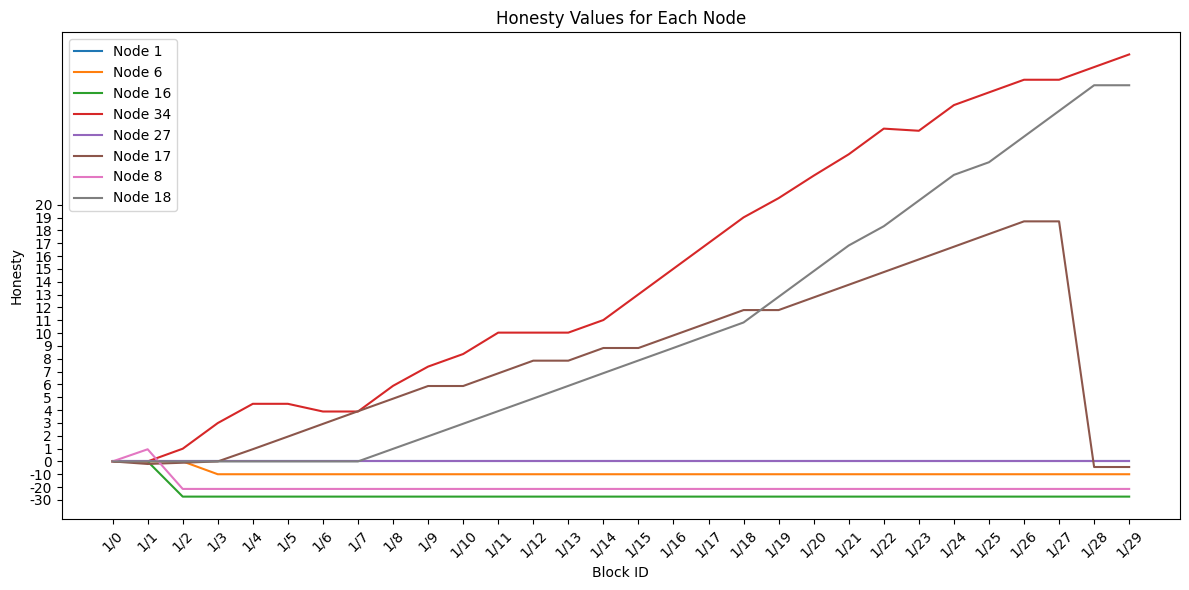

In [5]:
y = [-3, -2, -1, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y_ticks = [-30, -20,-10, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  # Custom y-axis tick values


def process_y_values(y_values):
    return [y / 10 if y < 0 else y for y in y_values]



specific_node_ids = [1,6,16,34,27,17,8,18]  

# Prepare data for plotting
# node_ids = sorted(honesty_values_dict.keys())
block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in specific_node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, process_y_values(honesty_values), label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(y, y_ticks)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()